In [1]:
push!(LOAD_PATH, "..")

4-element Array{ByteString,1}:
 "/Applications/Julia-0.4.1.app/Contents/Resources/julia/local/share/julia/site/v0.4"
 "/Applications/Julia-0.4.1.app/Contents/Resources/julia/share/julia/site/v0.4"      
 "/Users/rdeits/6.338/hw2"                                                           
 ".."                                                                                

In [3]:
using PyPlot

In [4]:
type Sides{T}
    right::T
    left::T
end 

In [39]:
reload("Ev3")
import Ev3
import Base: start, next, done

In [40]:
us = Ev3.Sensor("in1", "192.168.1.27")
gyro = Ev3.Sensor("in4", "192.168.1.27")
@time for j = 1:10; Ev3.value0(gyro); end

  0.169771 seconds (302 allocations: 14.156 KB)


In [7]:
head = Ev3.Motor("outD", "192.168.1.27")

Ev3.Motor(Ev3.RemoteNode("/sys/class/tacho-motor/motor10","192.168.1.27",ZMQ.Socket(Ptr{Void} @0x00007fd0db1fb000,Base._FDWatcher(Ptr{Void} @0x00007fd0e0625830,(1,0),Condition(Any[]),(false,false)))),Set(SubString{ASCIIString}["run-timed","stop","run-direct","run-to-rel-pos","reset","run-forever","run-to-abs-pos"]))

In [42]:
motors = Dict(:right=>Ev3.Motor("outC", "192.168.1.27"), :left=>Ev3.Motor("outB", "192.168.1.27"))
Ev3.speed_regulation(motors[:right], "on")
Ev3.speed_regulation(motors[:left], "on")
Ev3.speed_sp(motors[:right], 100)
Ev3.speed_sp(motors[:left], 100)
Ev3.position_sp(motors[:right], 360 * 5)
Ev3.position_sp(motors[:left], 360 * 5)
Ev3.command(motors[:right], "run-to-rel-pos")
Ev3.command(motors[:left], "run-to-rel-pos")

"ok"

In [16]:
zero_pos = Ev3.position(head)

-241

In [34]:
map = Any[]

0-element Array{Any,1}

In [35]:
Ev3.speed_regulation(head, "on")
Ev3.speed_sp(head, -50)
Ev3.command(head, "run-forever")
while Ev3.position(head) > zero_pos - 85 * 40/8
end
Ev3.speed_sp(head, 50)
Ev3.command(head, "run-forever")
while Ev3.position(head) < zero_pos + 85 * 40/8
    distance = Ev3.values(us)[1]
    if distance < 250 
        yaw = (Ev3.position(head) - zero_pos) * pi / 180 * 8 / 40
        x = distance * cos(yaw)
        y = distance * sin(yaw)
        push!(map, (x, y))
    end
end
Ev3.speed_sp(head, -50)
Ev3.command(head, "run-forever")
while Ev3.position(head) > zero_pos
end
Ev3.stop(head, "brake")

"ok"

In [38]:
map

398-element Array{Any,1}:
 (5.69412362734898,-70.77130037039355)  
 (5.69412362734898,-70.77130037039355)  
 (6.644046920287109,-70.28667470097746) 
 (7.421520892003396,-70.6110545711474)  
 (7.379709506696335,-70.2132458130001)  
 (7.379709506696335,-70.2132458130001)  
 (7.421520892003396,-70.6110545711474)  
 (8.359320162438967,-70.10336487232152) 
 (9.635805642835614,-70.3430966734725)  
 (9.635805642835614,-70.3430966734725)  
 (9.635805642835614,-70.3430966734725)  
 (10.861994376166706,-70.16421508270525)
 (10.861994376166706,-70.16421508270525)
 ⋮                                      
 (6.666391535987136,47.433840492721224) 
 (6.666391535987136,47.433840492721224) 
 (6.666391535987136,47.433840492721224) 
 (5.505489508608311,47.582555472258996) 
 (5.671550081881396,47.56304783830313)  
 (5.671550081881396,47.56304783830313)  
 (5.671550081881396,47.56304783830313)  
 (5.671550081881396,47.56304783830313)  
 (5.505489508608311,47.582555472258996) 
 (5.33936185268299,47.601483327

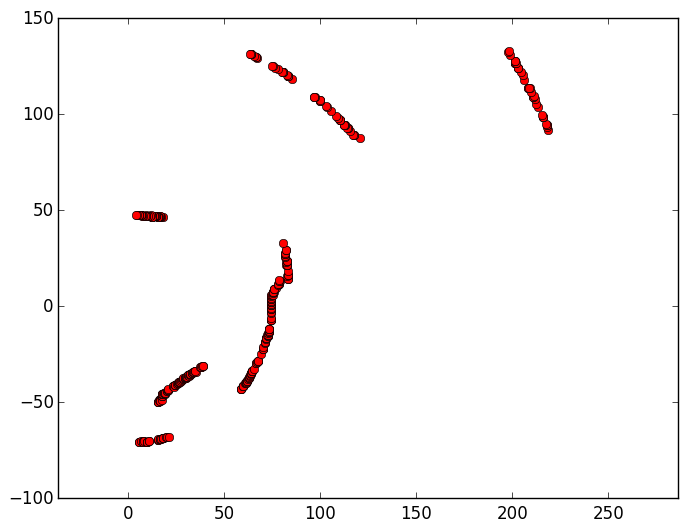

(0.0,250.0,-100.0,150.0)

In [37]:
plot([x[1] for x in map], [x[2] for x in map], "ro")
axis("equal")

In [54]:
Ev3.position_sp(head, -90)
Ev3.command(head, "run-to-rel-pos")

"ok"

In [53]:
Ev3.position(head)

1

In [96]:
Ev3.stop(head)

"ok"

In [15]:
motors = Sides(Ev3.Motor("outC", "192.168.1.27"), Ev3.Motor("outB", "192.168.1.27"))
for motor in motors
    Ev3.polarity(motor, "normal")
end
for motor in motors
    Ev3.run_at_speed(motor, -100)
end
sleep(3.0)
for motor in motors
    Ev3.stop(motor, "brake")
end

In [28]:
motors = Sides(Ev3.Motor("outC", "192.168.1.27"), Ev3.Motor("outB", "192.168.1.27"))
gyro = Ev3.Sensor("in4", "192.168.1.27")
for motor in motors
    Ev3.polarity(motor, "normal")
end
initial_angle = Ev3.values(gyro)[1]
Ev3.run_at_speed(motors.right, 100)
Ev3.run_at_speed(motors.left, -100)
angle = Ev3.values(gyro)[1]
while angle > initial_angle - 90
    angle = Ev3.values(gyro)[1]
    println(initial_angle, " ", angle)
end
map(motor -> Ev3.stop(motor, "brake"), motors)

-1952.0 -1952.0
-1952.0 -1953.0
-1952.0 -1953.0
-1952.0 -1959.0
-1952.0 -1961.0
-1952.0 -1961.0
-1952.0 -1968.0
-1952.0 -1970.0
-1952.0 -1970.0
-1952.0 -1972.0
-1952.0 -1972.0
-1952.0 -1977.0
-1952.0 -1977.0
-1952.0 -1977.0
-1952.0 -1981.0
-1952.0 -1981.0
-1952.0 -1987.0
-1952.0 -1987.0
-1952.0 -1992.0
-1952.0 -1992.0
-1952.0 -1992.0
-1952.0 -1997.0
-1952.0 -1997.0
-1952.0 -1999.0
-1952.0 -2002.0
-1952.0 -2002.0
-1952.0 -2002.0
-1952.0 -2007.0
-1952.0 -2007.0
-1952.0 -2010.0
-1952.0 -2013.0
-1952.0 -2013.0
-1952.0 -2016.0
-1952.0 -2021.0
-1952.0 -2023.0
-1952.0 -2023.0
-1952.0 -2028.0
-1952.0 -2028.0
-1952.0 -2028.0
-1952.0 -2033.0
-1952.0 -2033.0
-1952.0 -2033.0
-1952.0 -2039.0
-1952.0 -2039.0
-1952.0 -2039.0


2-element Array{Any,1}:
 "ok"
 "ok"

-1952.0 -2044.0


In [26]:
map(x -> Ev3.stop(x, "brake"), motors)

2-element Array{Any,1}:
 "ok"
 "ok"

Mapping